## Pip Installs and Imports

In [2]:
# pip install convokit

In [34]:
from convokit import Corpus, download
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Explorative Data Anlyses

In [19]:
corpus = Corpus(filename=download("movie-corpus"))

In [20]:
corpus.print_summary_stats()

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


In [21]:
utterances = corpus.get_utterances_dataframe()

In [22]:
utterances.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors
id,,,,,,,,
L1045,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[]
L1044,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[]
L985,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[]
L984,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[]
L925,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[]


In [23]:
utterances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304713 entries, L1045 to L666256
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   timestamp        0 non-null       object
 1   text             304713 non-null  object
 2   speaker          304713 non-null  object
 3   reply_to         221616 non-null  object
 4   conversation_id  304713 non-null  object
 5   meta.movie_id    304713 non-null  object
 6   meta.parsed      304713 non-null  object
 7   vectors          304713 non-null  object
dtypes: object(8)
memory usage: 20.9+ MB


In [24]:
conversations = corpus.get_conversations_dataframe()

In [25]:
conversations.head()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
id,,,,,,,
L1044,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L984,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L924,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L870,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L866,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"


In [26]:
conversations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83097 entries, L1044 to L666256
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   vectors            83097 non-null  object
 1   meta.movie_idx     83097 non-null  object
 2   meta.movie_name    83097 non-null  object
 3   meta.release_year  83097 non-null  object
 4   meta.rating        83097 non-null  object
 5   meta.votes         83097 non-null  object
 6   meta.genre         83097 non-null  object
dtypes: object(7)
memory usage: 5.1+ MB


In [27]:
conversations.describe()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
count,83097,83097,83097,83097,83097,83097,83097
unique,1,617,617,88,62,614,290
top,[],m289,casino,1999,7.20,111223,['drama']
freq,83097,338,338,6646,3694,338,5027


## Choosing only one meta.genre for movie

In [28]:
# Downloading conversations as an excel 
with pd.ExcelWriter('movies_data.xlsx') as writer:
    conversations.to_excel(writer, sheet_name='Conversations', index=False)

print("Data saved to movies_data.xlsx")

# From here the dataset can be modified manually choosing only one genre from the list in mets.genre
# The choice can be more accurate because one genre is often prominent in a movie and a human can detect it but time consuming

Data saved to movies_data.xlsx


In [29]:
# Other way to proceed is automatization so to choose only first genre
# Function to extract the first genre

def extract_first_genre(meta_genre):
    if isinstance(meta_genre, str) and meta_genre.startswith('[') and meta_genre.endswith(']'):
        genres = meta_genre.strip("[]").replace("'", "").split(", ") # Creates a proper python list
        if genres:
            return genres[0] # Takes only the first element of the list
    return meta_genre

# Apply the function to the 'meta.genre' column
conversations['meta.genre'] = conversations['meta.genre'].apply(extract_first_genre)

conversations.head()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
id,,,,,,,
L1044,[],m0,10 things i hate about you,1999,6.90,62847,comedy
L984,[],m0,10 things i hate about you,1999,6.90,62847,comedy
L924,[],m0,10 things i hate about you,1999,6.90,62847,comedy
L870,[],m0,10 things i hate about you,1999,6.90,62847,comedy
L866,[],m0,10 things i hate about you,1999,6.90,62847,comedy


In [31]:
conversations.describe()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
count,83097,83097,83097,83097,83097,83097,83097
unique,1,617,617,88,62,614,18
top,[],m289,casino,1999,7.20,111223,action
freq,83097,338,338,6646,3694,338,18998


## Merge the Dataframes

In [33]:
# Merge the DataFrames on 'conversation_id' from utterances and 'id' from conversations
merged_df = pd.merge(utterances, conversations, left_on='conversation_id', right_on='id', suffixes=('_utterance', '_conversation'))
merged_df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors_utterance,vectors_conversation,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
0,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,10 things i hate about you,1999,6.90,62847,comedy
1,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,10 things i hate about you,1999,6.90,62847,comedy
2,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],[],m0,10 things i hate about you,1999,6.90,62847,comedy
3,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[],[],m0,10 things i hate about you,1999,6.90,62847,comedy
4,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[],[],m0,10 things i hate about you,1999,6.90,62847,comedy


In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304713 entries, 0 to 304712
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   timestamp             0 non-null       object
 1   text                  304713 non-null  object
 2   speaker               304713 non-null  object
 3   reply_to              221616 non-null  object
 4   conversation_id       304713 non-null  object
 5   meta.movie_id         304713 non-null  object
 6   meta.parsed           304713 non-null  object
 7   vectors_utterance     304713 non-null  object
 8   vectors_conversation  304713 non-null  object
 9   meta.movie_idx        304713 non-null  object
 10  meta.movie_name       304713 non-null  object
 11  meta.release_year     304713 non-null  object
 12  meta.rating           304713 non-null  object
 13  meta.votes            304713 non-null  object
 14  meta.genre            304713 non-null  object
dtypes: object(15)
mem

In [50]:
merged_df['meta.rating'] = pd.to_numeric(merged_df['meta.rating'], errors='coerce')
merged_df['meta.votes'] = pd.to_numeric(merged_df['meta.votes'], errors='coerce')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304713 entries, 0 to 304712
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             0 non-null       object 
 1   text                  304713 non-null  object 
 2   speaker               304713 non-null  object 
 3   reply_to              221616 non-null  object 
 4   conversation_id       304713 non-null  object 
 5   meta.movie_id         304713 non-null  object 
 6   meta.parsed           304713 non-null  object 
 7   vectors_utterance     304713 non-null  object 
 8   vectors_conversation  304713 non-null  object 
 9   meta.movie_idx        304713 non-null  object 
 10  meta.movie_name       304713 non-null  object 
 11  meta.release_year     304713 non-null  object 
 12  meta.rating           304713 non-null  float64
 13  meta.votes            304713 non-null  int64  
 14  meta.genre            304713 non-null  object 
dtype

## Checking for empty genres

In [55]:
merged_df['meta.genre'].unique()

array(['comedy', 'adventure', 'action', 'crime', 'fantasy', 'sci-fi',
       'drama', 'biography', 'horror', 'animation', 'thriller', 'mystery',
       '', 'short', 'family', 'romance', 'documentary', 'film-noir'],
      dtype=object)

In [62]:
empty_genre_rows = merged_df[merged_df['meta.genre'] == ''].count()
print("Rows with empty genre:")
print(empty_genre_rows)

Rows with empty genre:
timestamp                 0
text                    359
speaker                 359
reply_to                248
conversation_id         359
meta.movie_id           359
meta.parsed             359
vectors_utterance       359
vectors_conversation    359
meta.movie_idx          359
meta.movie_name         359
meta.release_year       359
meta.rating             359
meta.votes              359
meta.genre              359
dtype: int64


In [64]:
merged_df['meta.genre'] = merged_df['meta.genre'].replace('', 'Undetected')
merged_df['meta.genre'].unique()

array(['comedy', 'adventure', 'action', 'crime', 'fantasy', 'sci-fi',
       'drama', 'biography', 'horror', 'animation', 'thriller', 'mystery',
       'Undetected', 'short', 'family', 'romance', 'documentary',
       'film-noir'], dtype=object)

## Visualizations of the Data

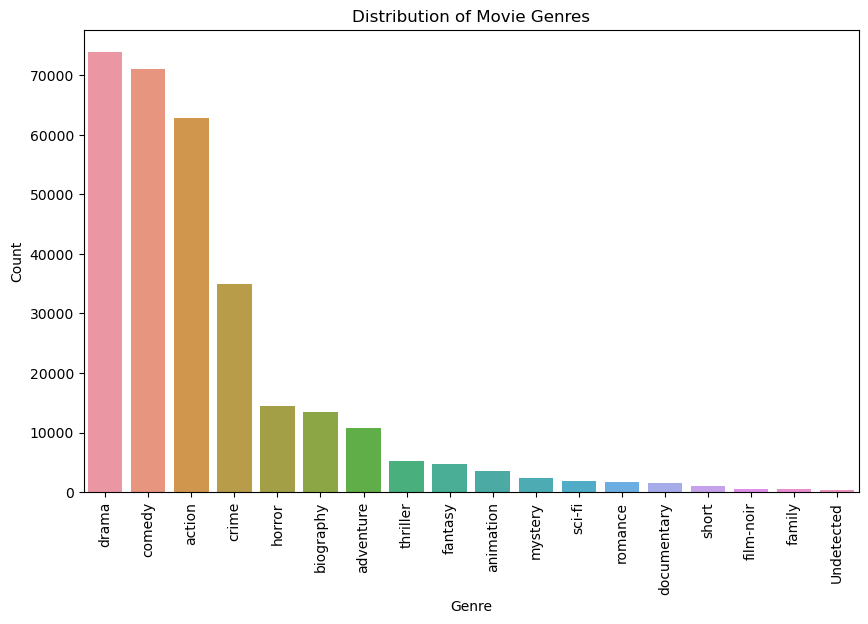

In [65]:
# Distribution of movie genres
genre_counts = merged_df['meta.genre'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

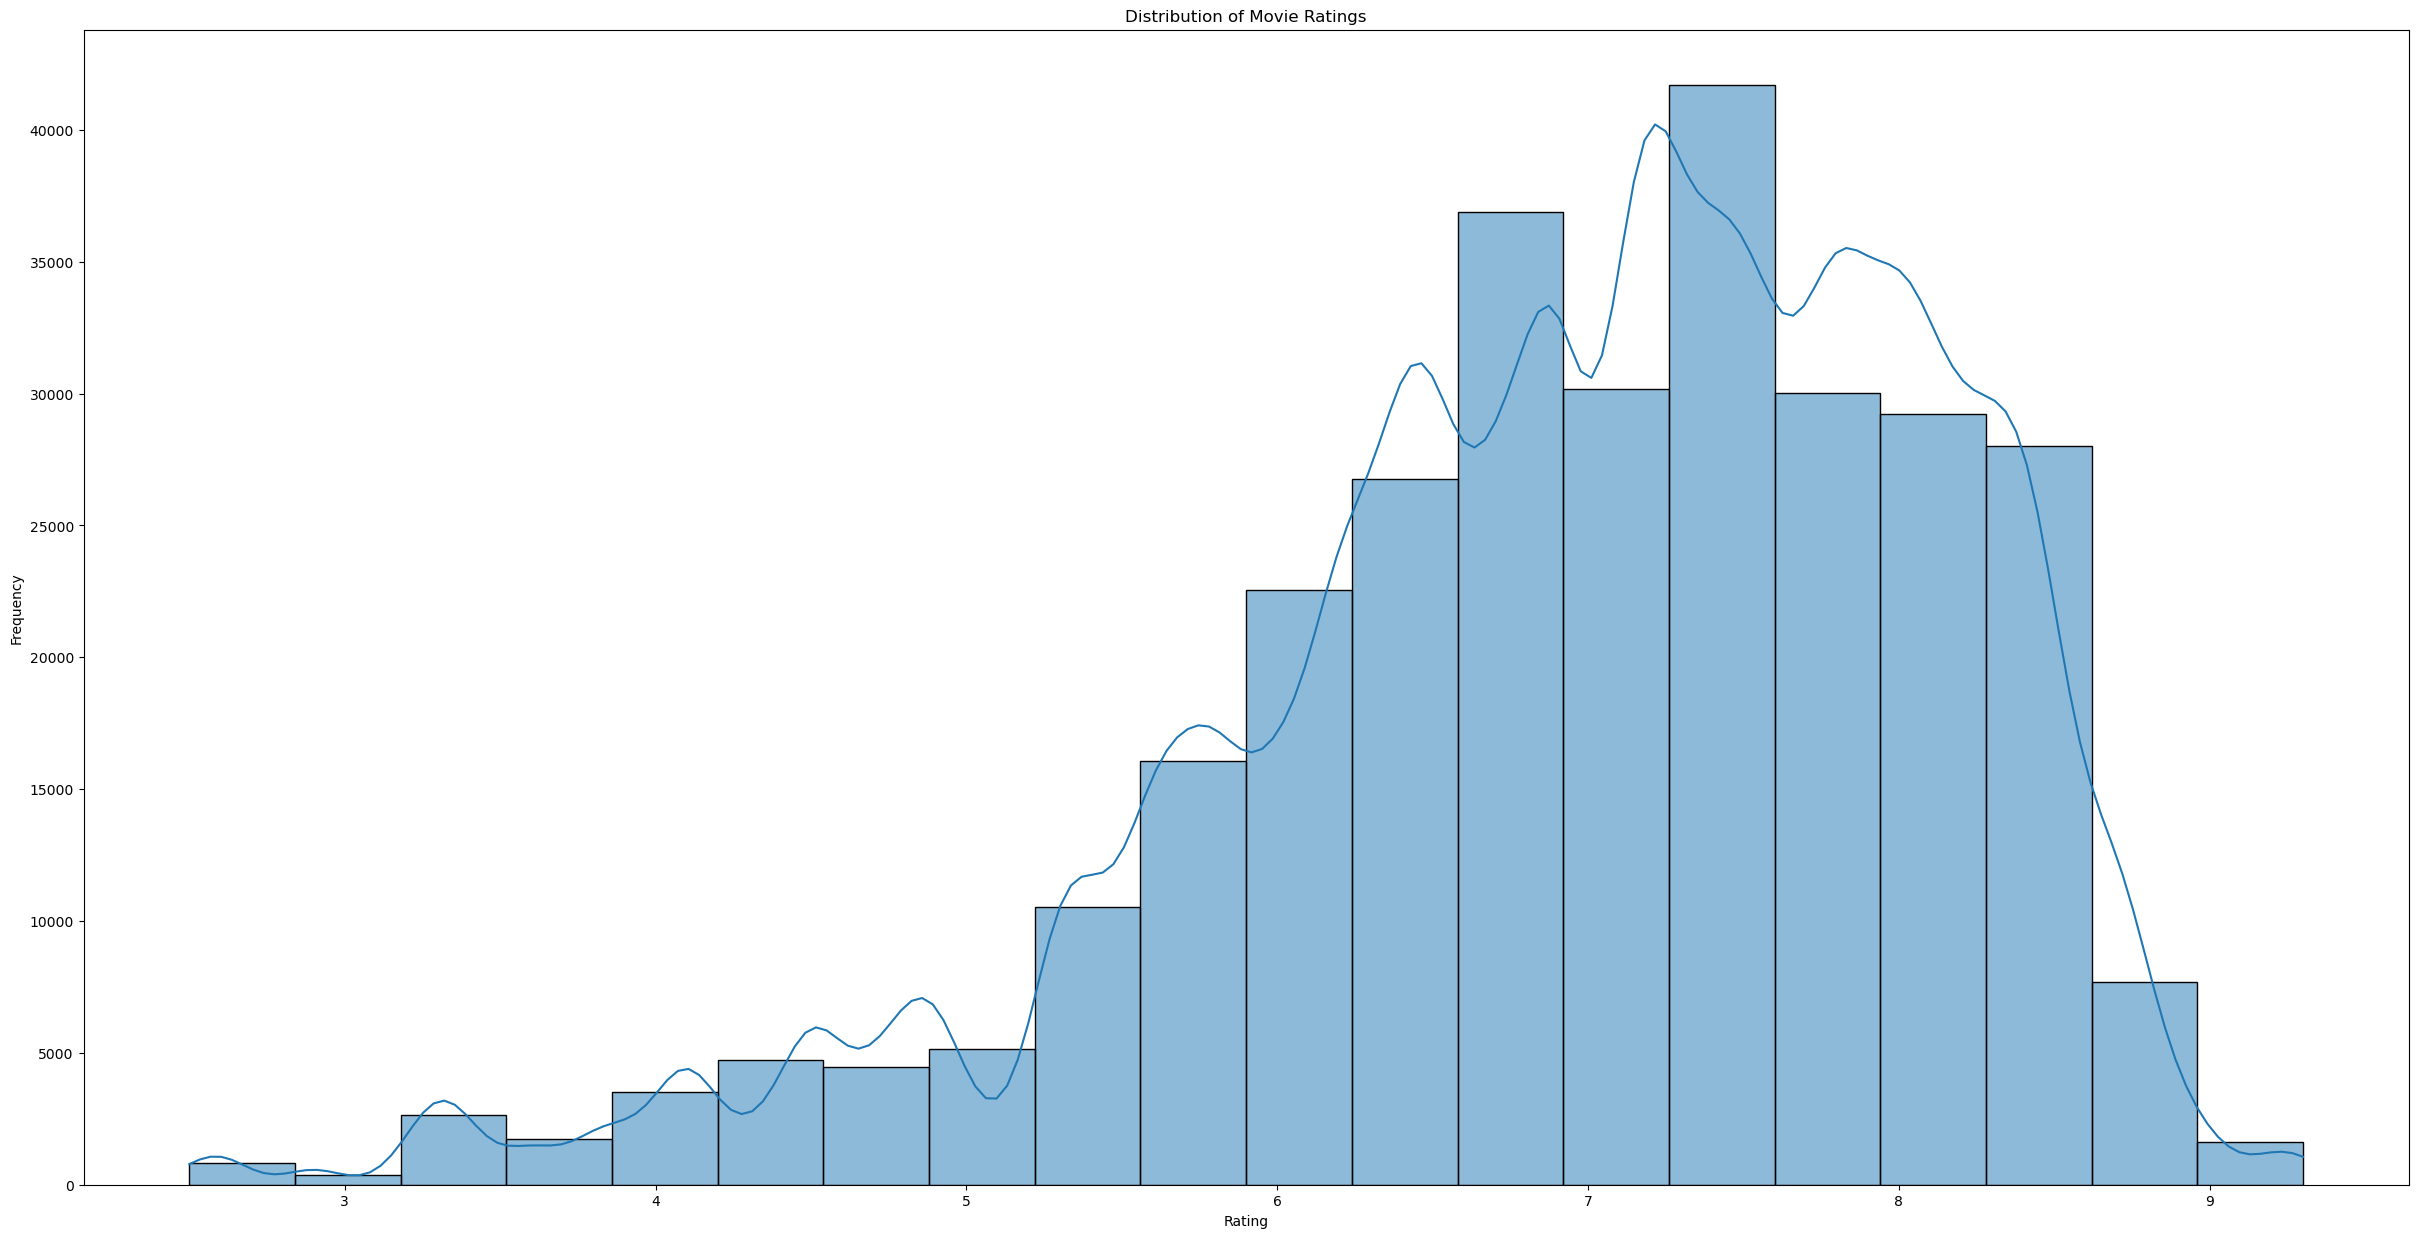

In [66]:
# Ratings Distribution 
plt.figure(figsize=(30, 15))
sns.histplot(merged_df['meta.rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [67]:
# Conversations per movie to show some movies present more conversations than others
conversations_per_movie = merged_df['meta.movie_name'].value_counts()

plt.figure(figsize=(100,85))
sns.barplot(x=conversations_per_movie.index, y=conversations_per_movie.values)
plt.title('Number of Conversations per Movie')
plt.xlabel('Movie')
plt.ylabel('Number of Conversations')
plt.xticks(rotation=90)
plt.show()

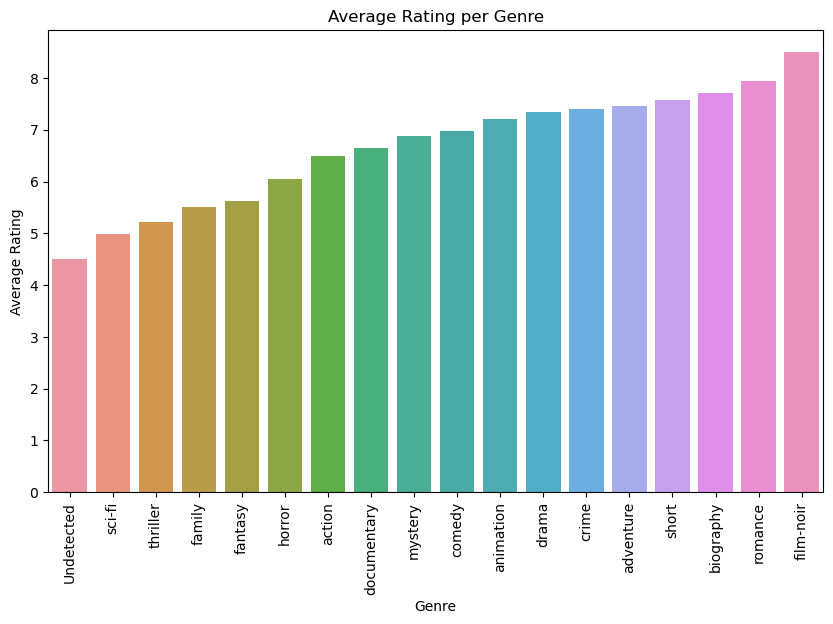

In [68]:
# Average rating per genre
average_rating_per_genre = merged_df.groupby('meta.genre')['meta.rating'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_per_genre.index, y=average_rating_per_genre.values)
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

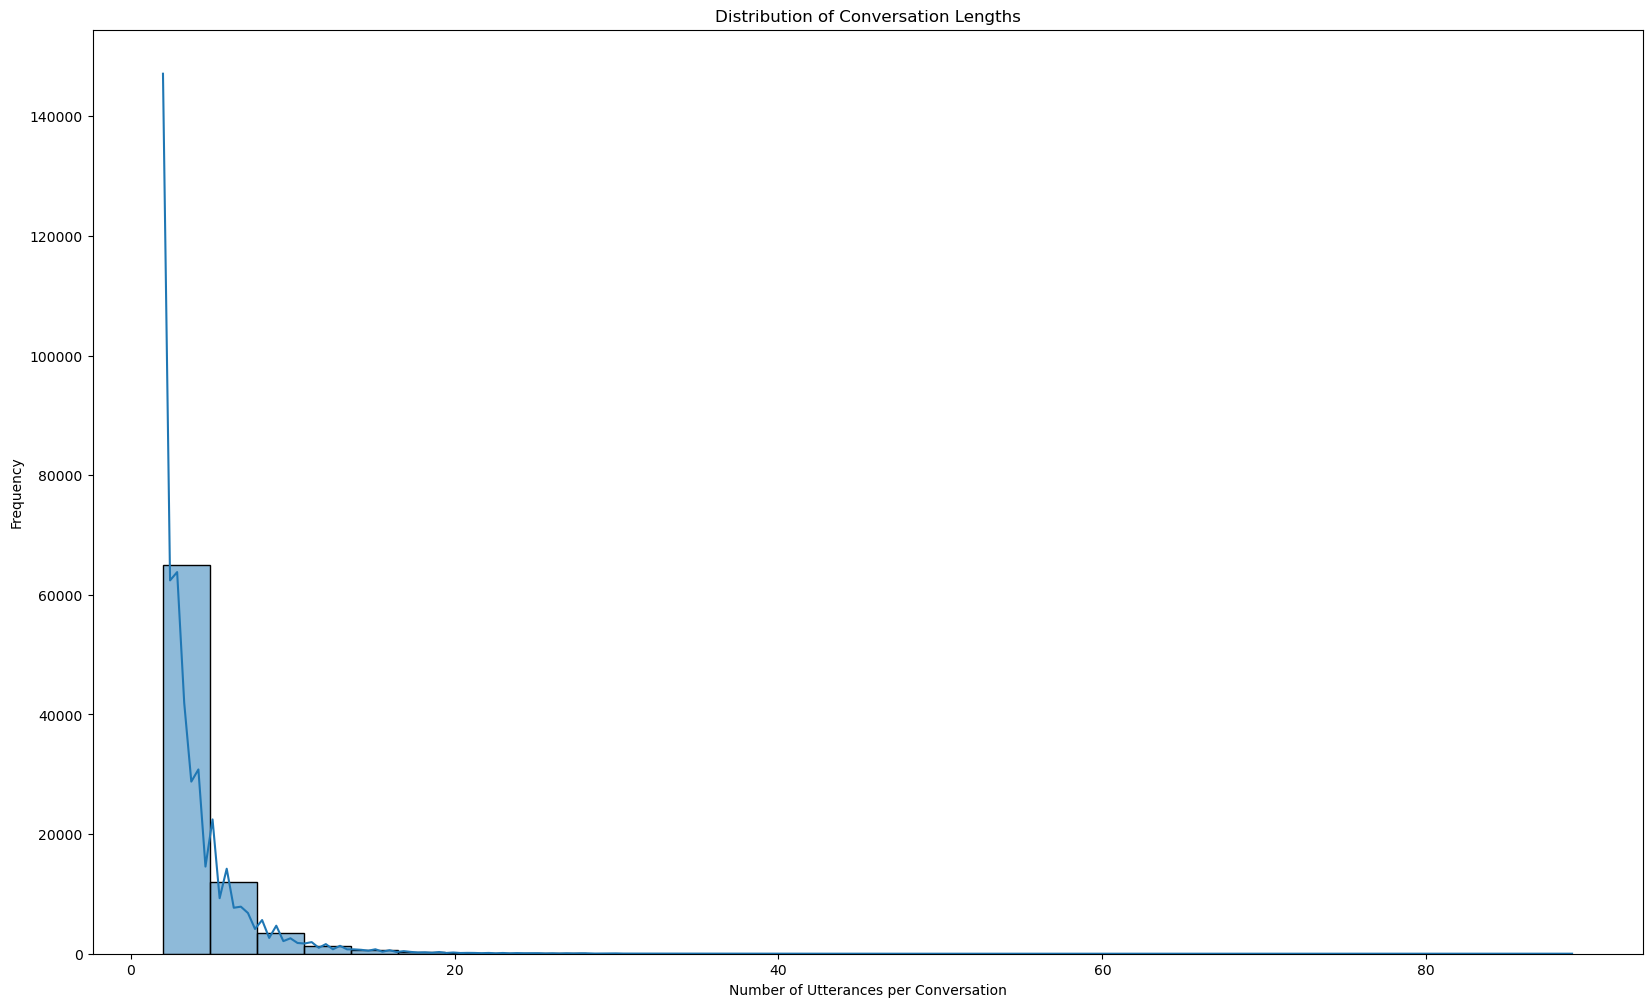

In [70]:
# Conversations lenghts
conversation_lengths = merged_df['conversation_id'].value_counts()

plt.figure(figsize=(20, 12))
sns.histplot(conversation_lengths, bins=30, kde=True)
plt.title('Distribution of Conversation Lengths')
plt.xlabel('Number of Utterances per Conversation')
plt.ylabel('Frequency')
plt.show()
